# Tomato Disease Detection<br>
Group no. 11 Group Member:<br>

Nakshatra Ghare<br>
Rutuja Sagare<br>
Pallavi Tapase<br>
Madhuri Kurhade



## Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
import cv2
from PIL import Image
from tensorflow.keras.models import Model
import os
import datetime
import tensorflow_hub as hub
import numpy as np
from keras import models,layers
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metric import roc_curve

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
###Checking if GPU is available or not
print("GPU is Available") if tf.config.list_physical_devices("GPU") else print("GPU Unavailable")

GPU is Available


Getting Data Ready
Set Image Size
Set Batch Set
Turn Images into tensors of size Image size

In [ ]:
IMAGE_SIZE = [256,224]
BATCH_SIZE = 64
CHANNELS = 3
EPOCHS = 100

In [ ]:
dir = "/content/drive/My Drive/TD/Tomato Disease "

In [ ]:
os.chdir(dir)
!ls

logs  models  testing  training  validation


In [ ]:
training_path = f"{dir}/training"
validation_path = f"{dir}/validation"
testing_path = f"{dir}/testing"

In [ ]:
print(training_path)

/content/drive/My Drive/TD/Tomato Disease /training


In [ ]:
os.chdir(training_path)
!ls
#len(ch)

Tomato_Bacterial_spot  Tomato_Septoria_leaf_spot
Tomato_Early_blight    Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_healthy	       Tomato__Target_Spot
Tomato_Late_blight     Tomato__Tomato_mosaic_virus
Tomato_Leaf_Mold       Tomato__Tomato_YellowLeaf__Curl_Virus


In [ ]:
len(ch)

580

In [ ]:
def create_dataset(i,filePath,label_mode):
  dataset = tf.keras.preprocessing.image_dataset_from_directory(
      filePath,
      image_size = (IMAGE_SIZE[i],IMAGE_SIZE[i]),
      batch_size = BATCH_SIZE,
      label_mode = label_mode
  )
  return dataset

In [ ]:
train_ds = create_dataset(1,training_path,"categorical")
valid_ds = create_dataset(1,validation_path,"categorical")

Found 7572 files belonging to 10 classes.
Found 937 files belonging to 10 classes.


In [ ]:
for image_batch,label_batch in train_ds.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(64, 224, 224, 3)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.

In [ ]:
num_classes = train_ds.class_names
num_classes

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

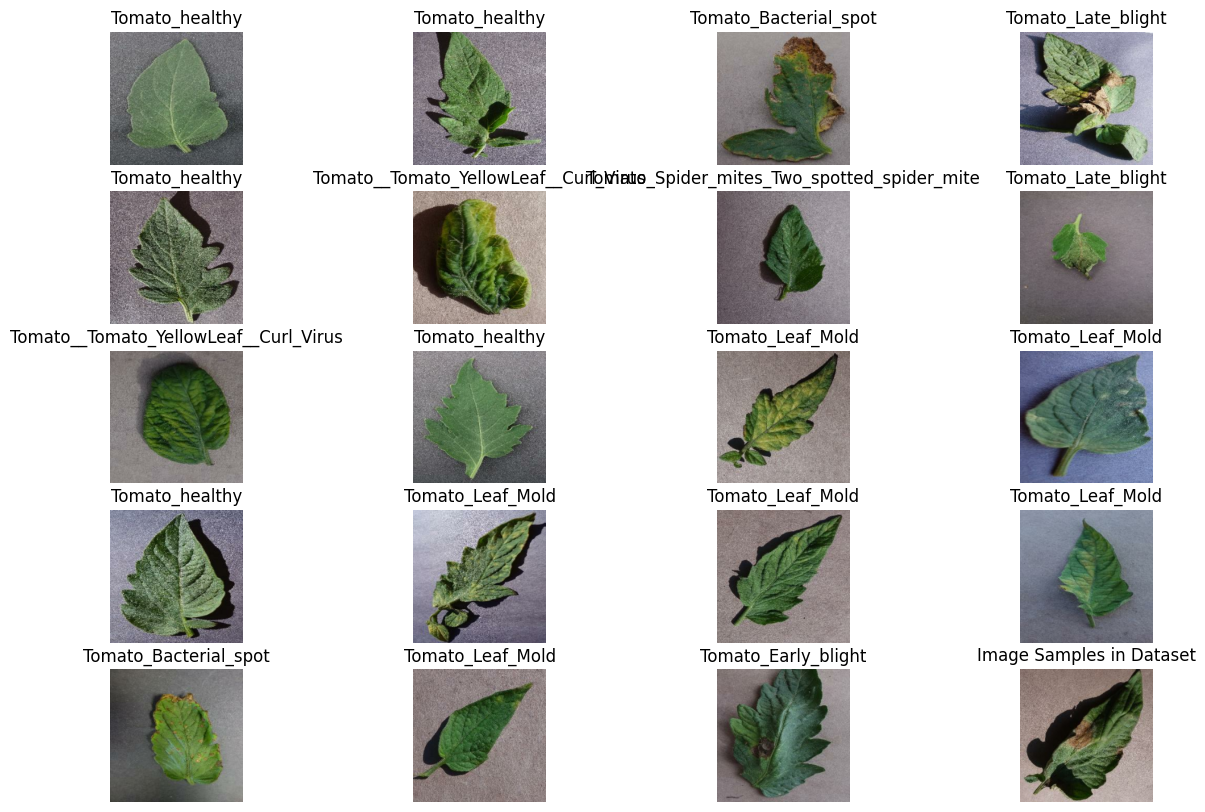

In [ ]:
plt.figure(figsize=(15,10))
for images,labels in train_ds.take(1):
  for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(images[i].numpy().astype("int"))
    plt.axis("off")
    plt.title(num_classes[np.argmax(labels[i])])
  plt.title("Image Samples in Dataset");


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
test_ds = create_dataset(0,testing_path,"int")

Found 900 files belonging to 10 classes.


In [ ]:
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
test_data = create_dataset(1,testing_path,"categorical")

Found 900 files belonging to 10 classes.


In [ ]:
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE[1],IMAGE_SIZE[1]),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
len(train_ds)

119

In [ ]:
57*64

3648

In [ ]:
print("TF Hub Version:",hub.__version__)

TF Hub Version: 0.13.0


# Model Building

1. MoblenetV2
2. EfficientnetV2
3. VGG19
4. CNN model

In [ ]:
INPUT_SHAPE = [64,IMAGE_SIZE[1],IMAGE_SIZE[1],3]

OUTPUT_SHAPE = len(num_classes)

MODEL_URL = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2"

In [ ]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building Model with",MODEL_URL)

  #Model formation
  model = tf.keras.Sequential([
      resize_and_rescale,
      data_augmentation,
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")
  ])
  #Compiling the model
  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )

  #Building model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

In [ ]:
#Load tensorboard notebook extension
%load_ext tensorboard

In [ ]:
NUM_EPOCHS = 100

In [ ]:
def train_model():
  """
  Train a given model and return the trained model
  """

  #Create a model
  model = create_model()

  #Fitting the model to the training dataset
  model.fit(
      x = train_ds,
      epochs = NUM_EPOCHS,
      validation_data = val_ds,
      validation_freq=1,
      callbacks = [early_stopping]
  )

  #Return model
  return model

In [ ]:
def get_diagnostic_plot(model,name):

  training_loss = model.history.history[name]
  test_loss = model.history.history[f'val_{name}']

  epoch_count = range(1,len(training_loss)+1)

  plt.plot(epoch_count,training_loss,'r--',label=f"Training {name}")
  plt.plot(epoch_count,test_loss,'b--',label=f"Validation {name}")
  plt.legend(loc="lower right")
  plt.title(f"Training and Validation {name}");
  plt.xlabel("Epoch")
  plt.ylabel(name)

In [ ]:
def get_diagnostic_plot_tandv(model,name):
  acc = model.history.history["accuracy"]
  val_acc = model.history.history["val_accuracy"]

  loss = model.history.history["loss"]
  val_loss = model.history.history["val_loss"]

  plt.figure(figsize=(10,8))
  plt.subplot(1,2,1)
  plt.plot(range(EPOCHS),acc,label="Training Accuracy")
  plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy");
  plt.show()

  plt.figure(figsize=(10,8))
  plt.subplot(1,2,1)
  plt.plot(range(EPOCHS),loss,label="Training Loss")
  plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss");
  plt.show()

In [ ]:
def save_model(model,model_name,suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """

  #Create a model firectory pathname with current time
  modeldir = os.path.join(f"drive/My Drive/TD/Tomato Disease /models/{model_name}",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" #Save format of model
  print(f"Saving model to: {model_path}")
  model.save(model_path)
  return model_path

In [ ]:
#Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading a saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

## EfficientNetV2

In [ ]:
model = create_model()
model.summary()

Building Model with https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (64, 224, 224, 3)         0         
                                                                 
 keras_layer (KerasLayer)    (64, 1000)                7200312   
                                                                 
 dense (Dense)               (64, 10)                  10010     
                                                                 
Total params: 7,210,322
Trainable params: 10,010
Non-trainable params: 7,200,312
_________________________________________________________________


In [ ]:
model_efiicient_net_v2 = train_model()

Building Model with https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2
Epoch 1/100
119/119 [==============================] - 33s 206ms/step - loss: 1.2460 - accuracy: 0.5876 - val_loss: 0.8419 - val_accuracy: 0.7261
Epoch 2/100
119/119 [==============================] - 32s 269ms/step - loss: 0.7194 - accuracy: 0.7628 - val_loss: 0.6518 - val_accuracy: 0.7867
Epoch 3/100
119/119 [==============================] - 22s 182ms/step - loss: 0.6001 - accuracy: 0.8035 - val_loss: 0.6509 - val_accuracy: 0.7703
Epoch 4/100
119/119 [==============================] - 22s 182ms/step - loss: 0.5334 - accuracy: 0.8281 - val_loss: 0.5319 - val_accuracy: 0.8212
Epoch 5/100
119/119 [==============================] - 22s 182ms/step - loss: 0.4934 - accuracy: 0.8393 - val_loss: 0.4805 - val_accuracy: 0.8423
Epoch 6/100
119/119 [==============================] - 22s 183ms/step - loss: 0.4555 - accuracy: 0.8543 - val_loss: 0.4737 - val_accuracy: 0.8403
Epoch 7/100
119/119 [==

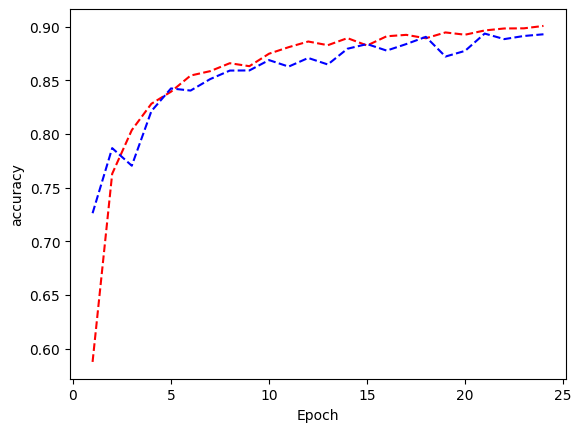

In [ ]:
get_diagnostic_plot(model_efiicient_net_v2,'accuracy')

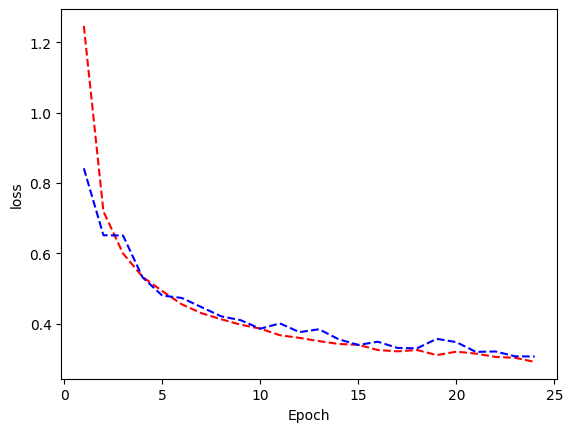

In [ ]:
get_diagnostic_plot(model_efiicient_net_v2,'loss')

In [ ]:
save_model(model_efiicient_net_v2,model_name="efficientnetv2",suffix='1')

Saving model to: drive/My Drive/TD/Tomato Disease /models/efficientnetv2/20230507-05061683436002-1.h5


'drive/My Drive/TD/Tomato Disease /models/efficientnetv2/20230507-05061683436002-1.h5'

## MobileNetV2

In [ ]:
INPUT_SHAPE = [64,IMAGE_SIZE[1],IMAGE_SIZE[1],3]

OUTPUT_SHAPE = len(num_classes)

MODEL_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
model_mobilenet_v2 = train_model()

Building Model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Epoch 1/100
119/119 [==============================] - 25s 173ms/step - loss: 1.2365 - accuracy: 0.5996 - val_loss: 0.8520 - val_accuracy: 0.7492
Epoch 2/100
119/119 [==============================] - 17s 145ms/step - loss: 0.6993 - accuracy: 0.7876 - val_loss: 0.6580 - val_accuracy: 0.8035
Epoch 3/100
119/119 [==============================] - 17s 145ms/step - loss: 0.5756 - accuracy: 0.8191 - val_loss: 0.5968 - val_accuracy: 0.8143
Epoch 4/100
119/119 [==============================] - 19s 164ms/step - loss: 0.5130 - accuracy: 0.8381 - val_loss: 0.5449 - val_accuracy: 0.8306
Epoch 5/100
119/119 [==============================] - 17s 144ms/step - loss: 0.4638 - accuracy: 0.8530 - val_loss: 0.4880 - val_accuracy: 0.8476
Epoch 6/100
119/119 [==============================] - 17s 145ms/step - loss: 0.4467 - accuracy: 0.8595 - val_loss: 0.4671 - val_accuracy: 0.8521
Epoch 7/100
119/119 [================

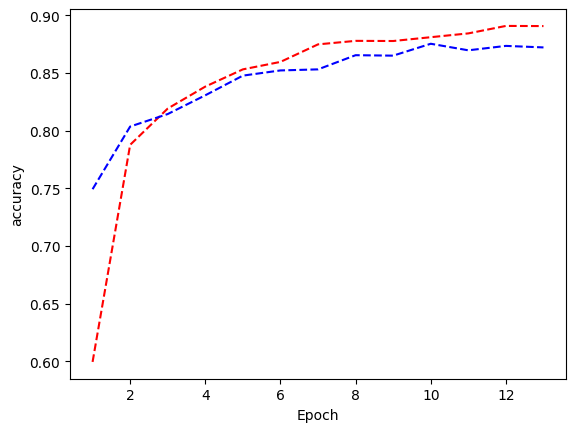

In [ ]:
get_diagnostic_plot(model_mobilenet_v2,'accuracy')

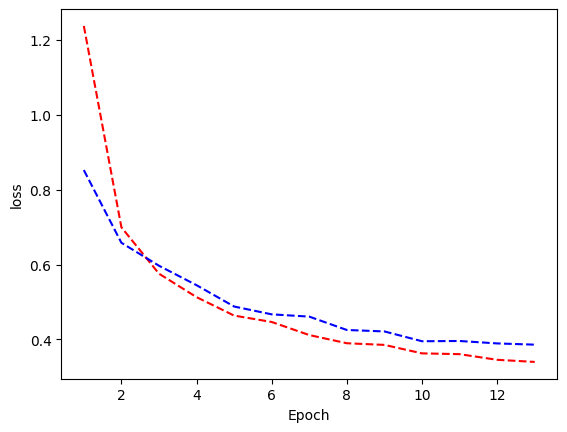

In [ ]:
get_diagnostic_plot(model_mobilenet_v2,'loss')

In [ ]:
save_model(model=model_mobilenet_v2,model_name="mobilenet_v2",suffix='1')

Saving model to: drive/My Drive/TD/Tomato Disease /models/mobilenet_v2/20230507-05191683436791-1.h5


'drive/My Drive/TD/Tomato Disease /models/mobilenet_v2/20230507-05191683436791-1.h5'

## VGG Model

In [ ]:
def create_VGG():
  resnet = VGG19(include_top = False,
               weights = 'imagenet',
               input_shape = (IMAGE_SIZE[1],IMAGE_SIZE[1],3),
               pooling = 'max'
               )
  output = resnet.layers[-1].output
  output = tf.keras.layers.Flatten()(output)
  resnet = Model(resnet.input,output)
  for layer in resnet.layers:
    layer.trainable = False
  return resnet

In [ ]:
model = create_VGG()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def build_vgg(model_add):
  model = tf.keras.Sequential([
      resize_and_rescale,
      data_augmentation
  ])
  model.add(model_add)
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(len(num_classes),activation='softmax'))

  model.compile(
      optimizer = tf.keras.optimizers.Adam(),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  model.fit(
      train_ds,
      validation_data = val_ds,
      epochs = NUM_EPOCHS,
      callbacks = [early_stopping]
  )
  return model

In [ ]:
model_VGG = build_vgg(model)

Epoch 1/100
119/119 [==============================] - 254s 667ms/step - loss: 1.9125 - accuracy: 0.3308 - val_loss: 1.4717 - val_accuracy: 0.5419
Epoch 2/100
119/119 [==============================] - 76s 638ms/step - loss: 1.4363 - accuracy: 0.5094 - val_loss: 1.2305 - val_accuracy: 0.5928
Epoch 3/100
119/119 [==============================] - 80s 671ms/step - loss: 1.2780 - accuracy: 0.5631 - val_loss: 1.0646 - val_accuracy: 0.6685
Epoch 4/100
119/119 [==============================] - 76s 637ms/step - loss: 1.1713 - accuracy: 0.5930 - val_loss: 1.0089 - val_accuracy: 0.6683
Epoch 5/100
119/119 [==============================] - 76s 637ms/step - loss: 1.1045 - accuracy: 0.6203 - val_loss: 0.9879 - val_accuracy: 0.6594
Epoch 6/100
119/119 [==============================] - 76s 638ms/step - loss: 1.0651 - accuracy: 0.6314 - val_loss: 0.9289 - val_accuracy: 0.6865
Epoch 7/100
119/119 [==============================] - 80s 672ms/step - loss: 1.0292 - accuracy: 0.6377 - val_loss: 0.8810 

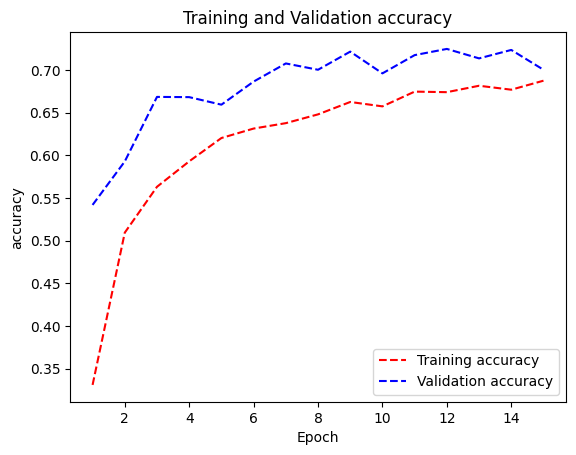

In [ ]:
get_diagnostic_plot(model_VGG,'accuracy')

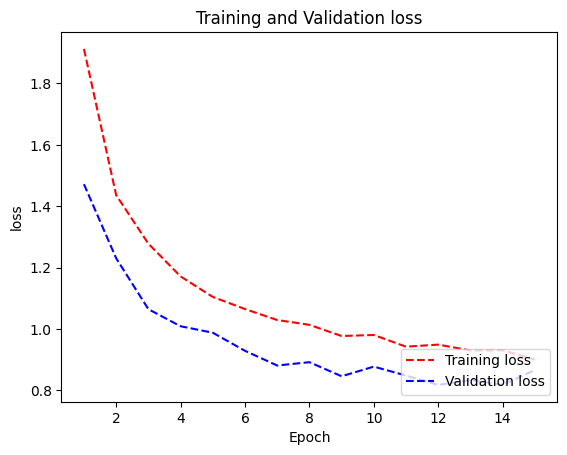

In [ ]:
get_diagnostic_plot(model_VGG,'loss')

In [ ]:
score_vgg = model_VGG.evaluate(test_data)

15/15 [==============================] - 91s 364ms/step - loss: 0.8304 - accuracy: 0.6933


In [ ]:
save_model(model_VGG,model_name="VGG",suffix='1')

Saving model to: drive/My Drive/TD/Tomato Disease /models/VGG/20230510-03221683688942-1.h5


'drive/My Drive/TD/Tomato Disease /models/VGG/20230510-03221683688942-1.h5'

## CNN
CNN Testing Series

In [ ]:
train_ds = create_dataset(0,training_path,"int")
val_ds = create_dataset(0,validation_path,"int")

Found 7572 files belonging to 10 classes.
Found 937 files belonging to 10 classes.


In [ ]:
for image_batch,label_batch in train_ds.take(1):
  print(image_batch.shape)
  print(image_batch[0])
  print(label_batch.numpy())


(64, 256, 256, 3)
tf.Tensor(
[[[174. 155. 149.]
  [171. 152. 146.]
  [160. 141. 135.]
  ...
  [140. 121. 115.]
  [195. 176. 170.]
  [161. 142. 136.]]

 [[171. 152. 146.]
  [180. 161. 155.]
  [170. 151. 145.]
  ...
  [169. 150. 144.]
  [134. 115. 109.]
  [159. 140. 134.]]

 [[171. 152. 146.]
  [177. 158. 152.]
  [169. 150. 144.]
  ...
  [135. 116. 110.]
  [110.  91.  85.]
  [121. 102.  96.]]

 ...

 [[179. 160. 153.]
  [174. 155. 148.]
  [176. 157. 150.]
  ...
  [203. 183. 174.]
  [153. 133. 124.]
  [123. 103.  94.]]

 [[182. 163. 156.]
  [171. 152. 145.]
  [167. 148. 141.]
  ...
  [126. 106.  97.]
  [150. 130. 121.]
  [161. 141. 132.]]

 [[186. 167. 160.]
  [165. 146. 139.]
  [151. 132. 125.]
  ...
  [135. 115. 106.]
  [131. 111. 102.]
  [140. 120. 111.]]], shape=(256, 256, 3), dtype=float32)
[7 1 1 6 3 5 8 6 2 5 5 2 8 1 7 0 1 7 9 4 5 9 2 4 0 6 2 3 4 4 6 5 2 9 3 4 3
 5 3 3 7 1 5 0 8 1 5 8 2 0 6 4 9 5 2 7 0 1 0 8 2 7 5 6]


In [ ]:
input_shape = (IMAGE_SIZE[0],IMAGE_SIZE[0],IMAGE_SIZE[0],3)
input_shape

(256, 256, 256, 3)

In [ ]:
def create_CNN():
  model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(num_classes),activation='softmax'),
    ])
  model.build(input_shape=input_shape)
  return model

In [ ]:
model = create_CNN()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (256, 222, 222, 32)       896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (256, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (256, 109, 109, 64)       18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (256, 54, 54, 64)        0         
 g2D)                                                 

In [ ]:
def build_CNN(model):
  model.compile(
      optimizer="adam",
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy']
  )
  model.fit(
      train_ds,
      epochs = NUM_EPOCHS,
      batch_size=BATCH_SIZE,
      verbose=1,
      validation_data = val_ds,
      callbacks=[early_stopping]
  )
  return model

### CNN Model 0

In [ ]:
model_CNN = build_CNN(model)

Epoch 1/100
119/119 [==============================] - 106s 851ms/step - loss: 2.1193 - accuracy: 0.2038 - val_loss: 1.8299 - val_accuracy: 0.3287
Epoch 2/100
119/119 [==============================] - 25s 199ms/step - loss: 1.6948 - accuracy: 0.3745 - val_loss: 1.5771 - val_accuracy: 0.4120
Epoch 3/100
119/119 [==============================] - 22s 173ms/step - loss: 1.3577 - accuracy: 0.5147 - val_loss: 1.1527 - val_accuracy: 0.5902
Epoch 4/100
119/119 [==============================] - 23s 182ms/step - loss: 1.0293 - accuracy: 0.6343 - val_loss: 0.9339 - val_accuracy: 0.6606
Epoch 5/100
119/119 [==============================] - 23s 184ms/step - loss: 0.8726 - accuracy: 0.6870 - val_loss: 0.9005 - val_accuracy: 0.6756
Epoch 6/100
119/119 [==============================] - 23s 182ms/step - loss: 0.7569 - accuracy: 0.7245 - val_loss: 0.8762 - val_accuracy: 0.6958
Epoch 7/100
119/119 [==============================] - 22s 175ms/step - loss: 0.6927 - accuracy: 0.7489 - val_loss: 0.8405 

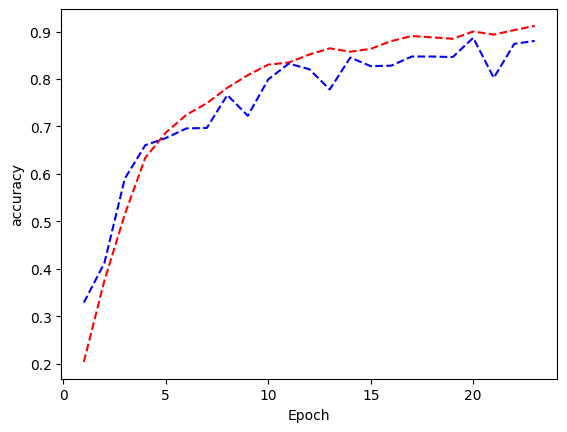

In [ ]:
get_diagnostic_plot(model_CNN,'accuracy')

### CNN Model 1

In [ ]:
def create_CNN1():
  model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(num_classes),activation='softmax'),
    ])
  model.build(input_shape=input_shape)
  return model

In [ ]:
model_1 = create_CNN1()
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (256, 222, 222, 32)       896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (256, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (256, 109, 109, 64)       18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (256, 54, 54, 64)        0         
 g2D)                                                 

In [ ]:
model_CNN1 = build_CNN(model_1)

Epoch 1/100
119/119 [==============================] - 26s 178ms/step - loss: 2.1141 - accuracy: 0.2018 - val_loss: 1.8219 - val_accuracy: 0.3394
Epoch 2/100
119/119 [==============================] - 23s 186ms/step - loss: 1.6482 - accuracy: 0.3941 - val_loss: 1.9297 - val_accuracy: 0.3522
Epoch 3/100
119/119 [==============================] - 24s 192ms/step - loss: 1.3258 - accuracy: 0.5050 - val_loss: 1.3678 - val_accuracy: 0.5112
Epoch 4/100
119/119 [==============================] - 28s 226ms/step - loss: 1.1438 - accuracy: 0.5775 - val_loss: 1.2670 - val_accuracy: 0.5603
Epoch 5/100
119/119 [==============================] - 22s 175ms/step - loss: 0.9551 - accuracy: 0.6525 - val_loss: 0.8390 - val_accuracy: 0.6926
Epoch 6/100
119/119 [==============================] - 23s 184ms/step - loss: 0.7937 - accuracy: 0.7145 - val_loss: 0.8002 - val_accuracy: 0.7097
Epoch 7/100
119/119 [==============================] - 22s 175ms/step - loss: 0.6848 - accuracy: 0.7552 - val_loss: 1.0900 -

### CNN Model 2

In [ ]:
def create_CNN2():
  model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(num_classes),activation='softmax'),
    ])
  model.build(input_shape=input_shape)
  return model

In [ ]:
model_2 = create_CNN2()
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_46 (Conv2D)          (256, 222, 222, 64)       1792      
                                                                 
 max_pooling2d_46 (MaxPoolin  (256, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (256, 109, 109, 128)      73856     
                                                                 
 max_pooling2d_47 (MaxPoolin  (256, 54, 54, 128)       0         
 g2D)                                                 

In [ ]:
model_CNN2 = build_CNN(model_2)

Epoch 1/100
119/119 [==============================] - 38s 252ms/step - loss: 2.1239 - accuracy: 0.2029 - val_loss: 1.9505 - val_accuracy: 0.3127
Epoch 2/100
119/119 [==============================] - 27s 220ms/step - loss: 1.6758 - accuracy: 0.3916 - val_loss: 1.6281 - val_accuracy: 0.4066
Epoch 3/100
119/119 [==============================] - 26s 212ms/step - loss: 1.3016 - accuracy: 0.5358 - val_loss: 1.0536 - val_accuracy: 0.6265
Epoch 4/100
119/119 [==============================] - 27s 215ms/step - loss: 0.9871 - accuracy: 0.6494 - val_loss: 0.8922 - val_accuracy: 0.6841
Epoch 5/100
119/119 [==============================] - 27s 218ms/step - loss: 0.7928 - accuracy: 0.7202 - val_loss: 0.7703 - val_accuracy: 0.7428
Epoch 6/100
119/119 [==============================] - 27s 216ms/step - loss: 0.7332 - accuracy: 0.7410 - val_loss: 1.0639 - val_accuracy: 0.6478
Epoch 7/100
119/119 [==============================] - 27s 218ms/step - loss: 0.6204 - accuracy: 0.7747 - val_loss: 0.7189 -

### CNN Model 3

In [ ]:
def create_CNN3():
  model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(len(num_classes),activation='softmax'),
    ])
  model.build(input_shape=input_shape)
  return model

In [ ]:
model_3 = create_CNN3()
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_68 (Conv2D)          (256, 222, 222, 64)       1792      
                                                                 
 max_pooling2d_68 (MaxPoolin  (256, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (256, 109, 109, 128)      73856     
                                                                 
 max_pooling2d_69 (MaxPoolin  (256, 54, 54, 128)       0         
 g2D)                                                

In [ ]:
train_ds = create_dataset(0,training_path,"int")
val_ds = create_dataset(0,validation_path,"int")

Found 7572 files belonging to 10 classes.
Found 937 files belonging to 10 classes.


In [ ]:
def build_CNN(model):
  model.compile(
      optimizer="adam",
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['accuracy']
  )
  model.fit(
      train_ds,
      epochs = NUM_EPOCHS,
      batch_size=BATCH_SIZE,
      verbose=1,
      validation_data = val_ds,
      callbacks=[early_stopping]
  )
  return model

In [ ]:
model_CNN3 = build_CNN(model_3)

Epoch 1/100
119/119 [==============================] - 30s 214ms/step - loss: 2.0758 - accuracy: 0.2224 - val_loss: 1.6668 - val_accuracy: 0.4280
Epoch 2/100
119/119 [==============================] - 27s 219ms/step - loss: 1.4848 - accuracy: 0.4592 - val_loss: 1.7341 - val_accuracy: 0.4578
Epoch 3/100
119/119 [==============================] - 27s 218ms/step - loss: 1.1887 - accuracy: 0.5779 - val_loss: 1.1712 - val_accuracy: 0.5795
Epoch 4/100
119/119 [==============================] - 27s 217ms/step - loss: 0.9595 - accuracy: 0.6510 - val_loss: 0.9586 - val_accuracy: 0.6499
Epoch 5/100
119/119 [==============================] - 27s 218ms/step - loss: 0.7848 - accuracy: 0.7237 - val_loss: 1.1707 - val_accuracy: 0.6713
Epoch 6/100
119/119 [==============================] - 27s 220ms/step - loss: 0.6568 - accuracy: 0.7662 - val_loss: 1.0506 - val_accuracy: 0.6777
Epoch 7/100
119/119 [==============================] - 27s 217ms/step - loss: 0.6029 - accuracy: 0.7857 - val_loss: 0.8141 -

Exception ignored in: <function _xla_gc_callback at 0x7f3e37015240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


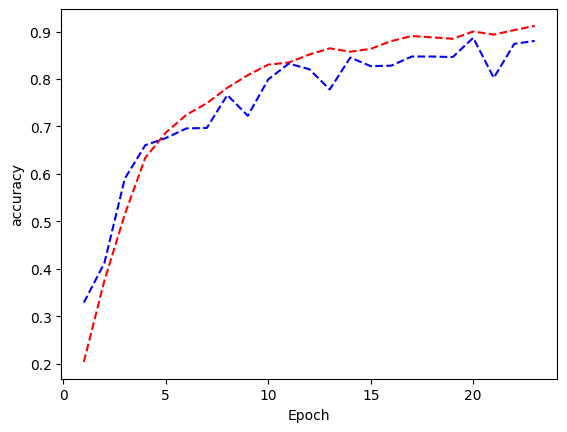

In [ ]:
get_diagnostic_plot(model_CNN3,'accuracy')

In [ ]:
save_model(model_CNN,"CNN",suffix='0')
save_model(model_CNN1,"CNN",suffix='1')
save_model(model_CNN2,"CNN",suffix='2')
save_model(model_CNN3,"CNN",suffix='3')

Saving model to: drive/My Drive/TD/Tomato Disease /models/CNN/20230507-10251683455116-0.h5
Saving model to: drive/My Drive/TD/Tomato Disease /models/CNN/20230507-10251683455116-1.h5
Saving model to: drive/My Drive/TD/Tomato Disease /models/CNN/20230507-10251683455116-2.h5
Saving model to: drive/My Drive/TD/Tomato Disease /models/CNN/20230507-10251683455116-3.h5


'drive/My Drive/TD/Tomato Disease /models/CNN/20230507-10251683455116-3.h5'

### CNN Model 4

In [ ]:
def create_CNN4():
  model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(len(num_classes),activation='softmax'),
    ])
  model.build(input_shape=input_shape)
  return model

In [ ]:
model_4 = create_CNN4()
model_4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_80 (Conv2D)          (256, 222, 222, 64)       1792      
                                                                 
 max_pooling2d_80 (MaxPoolin  (256, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (256, 109, 109, 128)      73856     
                                                                 
 max_pooling2d_81 (MaxPoolin  (256, 54, 54, 128)       0         
 g2D)                                                

In [ ]:
model_CNN4 = build_CNN(model_4)

Epoch 1/100
119/119 [==============================] - 32s 222ms/step - loss: 2.2422 - accuracy: 0.1454 - val_loss: 2.1359 - val_accuracy: 0.2519
Epoch 2/100
119/119 [==============================] - 27s 221ms/step - loss: 1.8818 - accuracy: 0.3176 - val_loss: 1.6752 - val_accuracy: 0.4386
Epoch 3/100
119/119 [==============================] - 27s 220ms/step - loss: 1.4296 - accuracy: 0.4860 - val_loss: 1.2845 - val_accuracy: 0.5080
Epoch 4/100
119/119 [==============================] - 27s 217ms/step - loss: 1.1904 - accuracy: 0.5614 - val_loss: 1.2984 - val_accuracy: 0.4963
Epoch 5/100
119/119 [==============================] - 27s 222ms/step - loss: 0.9715 - accuracy: 0.6417 - val_loss: 0.8988 - val_accuracy: 0.6724
Epoch 6/100
119/119 [==============================] - 27s 220ms/step - loss: 0.8005 - accuracy: 0.7046 - val_loss: 0.8419 - val_accuracy: 0.6884
Epoch 7/100
119/119 [==============================] - 27s 221ms/step - loss: 0.7001 - accuracy: 0.7476 - val_loss: 0.8427 -

In [ ]:
save_model(model_CNN4,model_name="CNN",suffix = '4')

Saving model to: drive/My Drive/TD/Tomato Disease /models/CNN/20230507-10421683456133-4.h5


'drive/My Drive/TD/Tomato Disease /models/CNN/20230507-10421683456133-4.h5'

### CNN Model 5

In [ ]:
def create_CNN5():
  model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(len(num_classes),activation='softmax'),
    ])
  model.build(input_shape=input_shape)
  return model

In [ ]:
model_5 = create_CNN5()
model_5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_104 (Conv2D)         (256, 222, 222, 64)       1792      
                                                                 
 max_pooling2d_99 (MaxPoolin  (256, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (256, 109, 109, 128)      73856     
                                                                 
 max_pooling2d_100 (MaxPooli  (256, 54, 54, 128)       0         
 ng2D)                                               

In [ ]:
model_CNN5 = build_CNN(model_5)

Epoch 1/100
119/119 [==============================] - 33s 233ms/step - loss: 2.1334 - accuracy: 0.1896 - val_loss: 1.8573 - val_accuracy: 0.3276
Epoch 2/100
119/119 [==============================] - 27s 221ms/step - loss: 1.6926 - accuracy: 0.3767 - val_loss: 1.6232 - val_accuracy: 0.4173
Epoch 3/100
119/119 [==============================] - 27s 220ms/step - loss: 1.4926 - accuracy: 0.4497 - val_loss: 1.4365 - val_accuracy: 0.4803
Epoch 4/100
119/119 [==============================] - 29s 237ms/step - loss: 1.3033 - accuracy: 0.5166 - val_loss: 2.0131 - val_accuracy: 0.3735
Epoch 5/100
119/119 [==============================] - 28s 224ms/step - loss: 1.1697 - accuracy: 0.5613 - val_loss: 0.9728 - val_accuracy: 0.6585
Epoch 6/100
119/119 [==============================] - 28s 224ms/step - loss: 0.9191 - accuracy: 0.6622 - val_loss: 1.0052 - val_accuracy: 0.6553
Epoch 7/100
119/119 [==============================] - 27s 218ms/step - loss: 0.7635 - accuracy: 0.7212 - val_loss: 0.8595 -

In [ ]:
y_true = []
y_preds = []
for images,labels in test_ds.take(1):
  for i in range(BATCH_SIZE):
    predicted_class,confidence = predict(CNN_7,images[i].numpy())
    actual_class = num_classes[labels[i]]
    y_true.append(actual_class)
    y_preds.append(predicted_class)

score = accuracy_score(y_true,y_preds)

1/1 [==============================] - 0s 18ms/step


In [ ]:
score

0.921875

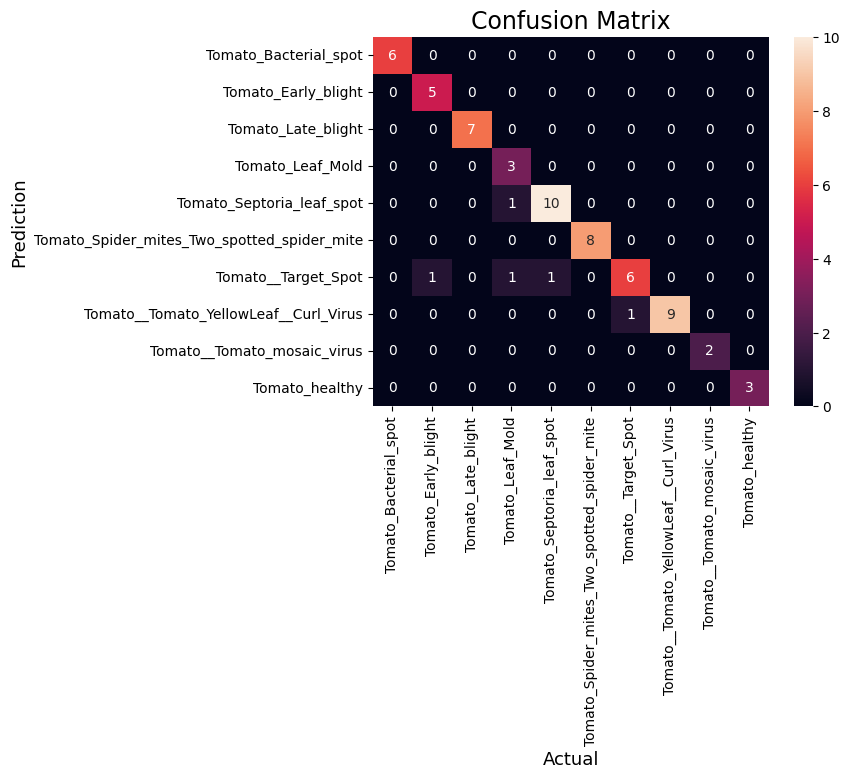

In [ ]:
cm = confusion_matrix(y_true,y_preds)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=num_classes,
            yticklabels=num_classes)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
def accuracy(model):
  y_true = []
  y_preds = []
  for images,labels in test_ds.skip(1).take(13):
    if(len(images)<64):
      continue
    for i in range(64):
      predicted_class,confidence = predict(CNN_7,images[i].numpy())
      actual_class = num_classes[labels[i]]
      y_true.append(actual_class)
      y_preds.append(predicted_class)

  score = accuracy_score(y_true,y_preds)
  return score

In [ ]:
CNN_score = accuracy(CNN_7)

1/1 [==============================] - 0s 21ms/step


In [ ]:
CNN_score

0.9049479166666666

In [ ]:
ev2 = load_model("drive/My Drive/TD/Tomato Disease /models/efficientnetv2/20230507-05061683436002-1.h5")

Loading a saved model from: drive/My Drive/TD/Tomato Disease /models/efficientnetv2/20230507-05061683436002-1.h5


In [ ]:
Efficientnet_v2 = accuracy(ev2)

1/1 [==============================] - 0s 81ms/step


In [ ]:
Efficientnet_v2

0.8694196428571429

In [ ]:
mv2 = load_model("drive/My Drive/TD/Tomato Disease /models/mobilenet_v2/20230507-05191683436791-1.h5")

Loading a saved model from: drive/My Drive/TD/Tomato Disease /models/mobilenet_v2/20230507-05191683436791-1.h5


In [ ]:
Mobilenetv2 = accuracy(mv2)
Mobilenetv2

1/1 [==============================] - 0s 75ms/step


0.8694196428571429

In [ ]:
vgg = load_model("drive/My Drive/TD/Tomato Disease /models/VGG/20230510-03221683688942-1.h5")

Loading a saved model from: drive/My Drive/TD/Tomato Disease /models/VGG/20230510-03221683688942-1.h5


In [ ]:
VGG19 = accuracy(vgg)

1/1 [==============================] - 0s 31ms/step


In [ ]:
VGG19

0.8997395833333334

In [ ]:
def create_CNN6():
  model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(len(num_classes),activation='softmax'),
    ])
  model.build(input_shape=input_shape)
  return model

In [ ]:
model_6 = create_CNN6()
model_6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 224, 224, 3)        0         
                                                                 
 sequential_1 (Sequential)   (256, 224, 224, 3)        0         
                                                                 
 conv2d_6 (Conv2D)           (256, 222, 222, 32)       896       
                                                                 
 max_pooling2d_6 (MaxPooling  (256, 111, 111, 32)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (256, 109, 109, 128)      36992     
                                                                 
 max_pooling2d_7 (MaxPooling  (256, 54, 54, 128)       0         
 2D)                                                  

### CNN Model 6


In [ ]:
CNN_6 = build_CNN(model_6)

Epoch 1/100
119/119 [==============================] - 1111s 9s/step - loss: 1.9589 - accuracy: 0.2841 - val_loss: 1.6300 - val_accuracy: 0.4557
Epoch 2/100
119/119 [==============================] - 26s 210ms/step - loss: 1.4248 - accuracy: 0.4993 - val_loss: 1.1029 - val_accuracy: 0.6169
Epoch 3/100
119/119 [==============================] - 24s 191ms/step - loss: 1.1289 - accuracy: 0.5964 - val_loss: 1.2407 - val_accuracy: 0.5603
Epoch 4/100
119/119 [==============================] - 26s 208ms/step - loss: 0.9539 - accuracy: 0.6557 - val_loss: 0.9582 - val_accuracy: 0.6670
Epoch 5/100
119/119 [==============================] - 25s 201ms/step - loss: 0.7954 - accuracy: 0.7072 - val_loss: 0.8796 - val_accuracy: 0.7012
Epoch 6/100
119/119 [==============================] - 24s 194ms/step - loss: 0.6959 - accuracy: 0.7504 - val_loss: 0.8749 - val_accuracy: 0.7225
Epoch 7/100
119/119 [==============================] - 24s 190ms/step - loss: 0.6408 - accuracy: 0.7709 - val_loss: 0.8472 - 

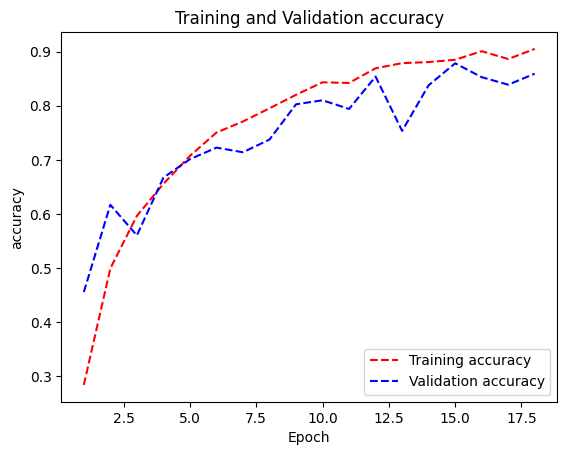

In [ ]:
get_diagnostic_plot(CNN_6,"accuracy")

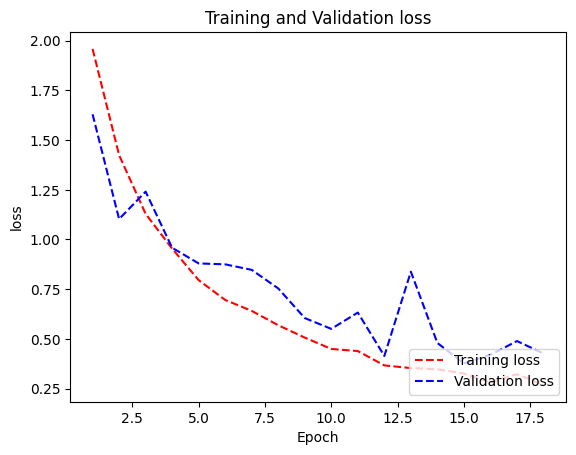

In [ ]:
get_diagnostic_plot(CNN_6,"loss")

In [ ]:
scores_cnn6 = CNN_6.evaluate(test_ds)

15/15 [==============================] - 97s 61ms/step - loss: 0.3916 - accuracy: 0.8589


### CNN Model 7

In [ ]:
def create_CNN7():
  model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,kernel_size =(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dense(len(num_classes),activation='softmax'),
    ])
  model.build(input_shape=input_shape)
  return model

In [ ]:
model_7 = create_CNN7()
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_35 (Conv2D)          (256, 222, 222, 64)       1792      
                                                                 
 max_pooling2d_31 (MaxPoolin  (256, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (256, 109, 109, 128)      73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (256, 54, 54, 128)       0         
 g2D)                                                 

In [ ]:
CNN_7 = build_CNN(model_7)

Epoch 1/100
119/119 [==============================] - 36s 231ms/step - loss: 2.0861 - accuracy: 0.2124 - val_loss: 2.2870 - val_accuracy: 0.2572
Epoch 2/100
119/119 [==============================] - 28s 229ms/step - loss: 1.6950 - accuracy: 0.3781 - val_loss: 1.7353 - val_accuracy: 0.3575
Epoch 3/100
119/119 [==============================] - 26s 213ms/step - loss: 1.4042 - accuracy: 0.4642 - val_loss: 1.4776 - val_accuracy: 0.4482
Epoch 4/100
119/119 [==============================] - 26s 212ms/step - loss: 1.2131 - accuracy: 0.5458 - val_loss: 1.5227 - val_accuracy: 0.4867
Epoch 5/100
119/119 [==============================] - 26s 213ms/step - loss: 0.9553 - accuracy: 0.6574 - val_loss: 0.8613 - val_accuracy: 0.6884
Epoch 6/100
119/119 [==============================] - 26s 213ms/step - loss: 0.7528 - accuracy: 0.7240 - val_loss: 0.8774 - val_accuracy: 0.6873
Epoch 7/100
119/119 [==============================] - 26s 209ms/step - loss: 0.6178 - accuracy: 0.7835 - val_loss: 0.8631 -

In [ ]:
save_model(CNN_7,"CNN",suffix='7')

Saving model to: drive/My Drive/TD/Tomato Disease /models/CNN/20230509-18001683655233-7.h5


'drive/My Drive/TD/Tomato Disease /models/CNN/20230509-18001683655233-7.h5'

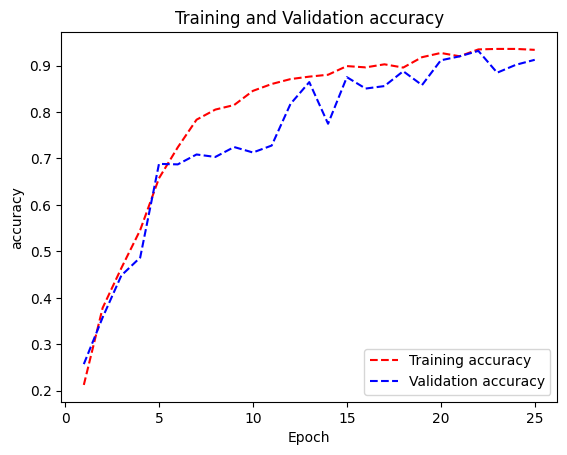

In [ ]:
get_diagnostic_plot(CNN_7,"accuracy")

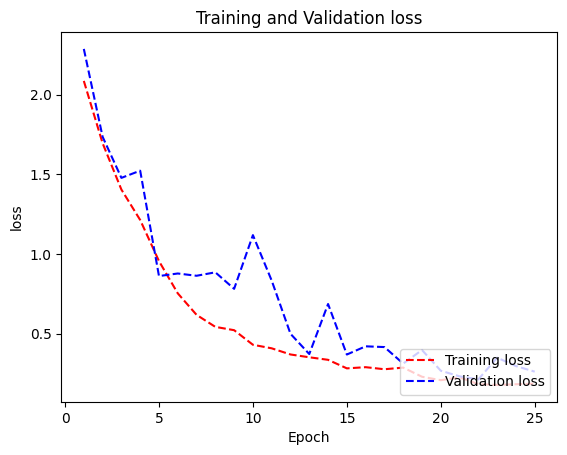

In [ ]:
get_diagnostic_plot(CNN_7,"loss")

In [ ]:
score_cnn7 = CNN_7.evaluate(test_ds)

15/15 [==============================] - 1s 74ms/step - loss: 0.3185 - accuracy: 0.9033


## Model Evaluation

In [ ]:
CNN_7 = load_model("drive/My Drive/TD/Tomato Disease /models/CNN/20230509-18001683655233-7.h5")
MV2 = load_model("drive/My Drive/TD/Tomato Disease /models/mobilenet_v2/20230507-05191683436791-1.h5")
EV2 = load_model("drive/My Drive/TD/Tomato Disease /models/efficientnetv2/20230507-05061683436002-1.h5")
VGG = load_model("drive/My Drive/TD/Tomato Disease /models/VGG/20230510-03221683688942-1.h5")

Loading a saved model from: drive/My Drive/TD/Tomato Disease /models/CNN/20230509-18001683655233-7.h5
Loading a saved model from: drive/My Drive/TD/Tomato Disease /models/mobilenet_v2/20230507-05191683436791-1.h5
Loading a saved model from: drive/My Drive/TD/Tomato Disease /models/efficientnetv2/20230507-05061683436002-1.h5
Loading a saved model from: drive/My Drive/TD/Tomato Disease /models/VGG/20230510-03221683688942-1.h5


In [ ]:
score_cnn7 = CNN_7.evaluate(test_ds)

15/15 [==============================] - 7s 78ms/step - loss: 0.3185 - accuracy: 0.9033


In [ ]:
score_mv2 = MV2.evaluate(test_data)

15/15 [==============================] - 3s 97ms/step - loss: 0.3731 - accuracy: 0.8789


In [ ]:
score_ev2 = EV2.evaluate(test_data)

15/15 [==============================] - 4s 121ms/step - loss: 0.3674 - accuracy: 0.8811


In [ ]:
score_vgg = VGG.evaluate(test_data)

15/15 [==============================] - 5s 307ms/step - loss: 0.8304 - accuracy: 0.6933


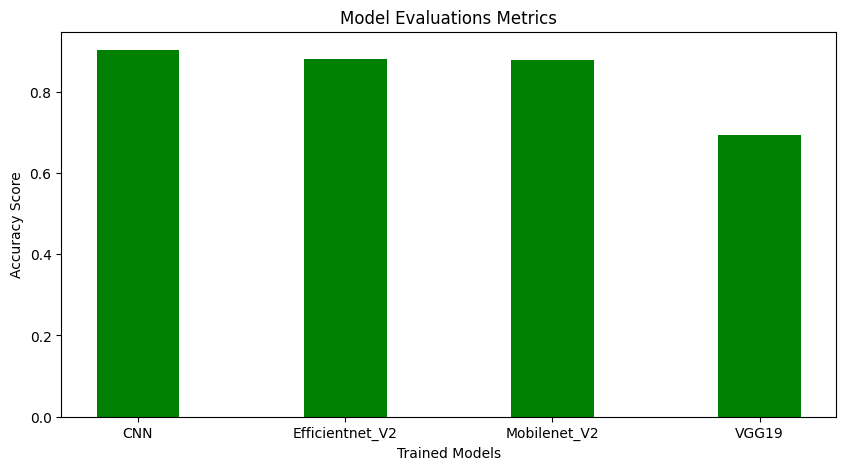

In [ ]:
accuracies = [score_cnn7[1],score_ev2[1],score_mv2[1],score_vgg[1]]
models = ["CNN","Efficientnet_V2","Mobilenet_V2","VGG19"]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(models, accuracies, color ='green',
        width = 0.4)

plt.xlabel("Trained Models")
plt.ylabel("Accuracy Score")
plt.title("Model Evaluations Metrics")
plt.show()

In [ ]:
def predict(model,img):
  image_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(image_array,0)

  predictions = model.predict(img_array)

  predicted_class = num_classes[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class,confidence = predict(CNN_7,images[i].numpy())
    actual_class = num_classes[labels[i]]
    plt.axis("off")
    plt.title(f"Actual:{actual_class}\n Predicted Class: {predicted_class}\n Confidence: {confidence}%")